# FAKE  NEWS  ANALYSIS

Fake news is a real problem in today’s world, and it has become more extensive and harder to identify.This model can detect fake news with higher accuracy within a few minutes after it propagates (early detection) than the baselines.

# 1.Import  the  libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# 2.Import  the  dataset

In [48]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("true.csv")

In [49]:
fake.shape

(23481, 4)

In [50]:
true.shape

(21417, 4)

# 3.Data cleaning and preparation

In [51]:
fake['target'] = 'fake'
true['target'] = 'true'

In [52]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [53]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


# Concatenation

In [54]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [55]:
data.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fake


In [56]:
data.tail(10)

,title,text,subject,date,target
44888,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",true
44889,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44890,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
44891,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",true
44892,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",true
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


# Shuffle the data

In [57]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [58]:
data.head(10)

,title,text,subject,date,target
0,Staunchly conservative U.S. lawmaker Scalise a...,"WASHINGTON (Reuters) - Steve Scalise, the Repu...",politicsNews,"June 14, 2017",true
1,Trump BASHES Obama With Hostile Fiction For N...,There are a lot of things citizens of the Unit...,News,"February 20, 2016",fake
2,Virginia Paper Trolls Gov. Pat McCrory Hard W...,After Gov. Pat McCrory (R) signed HB2 dubbed...,News,"October 29, 2016",fake
3,FEDS SPEND BIG BUCKS On Minority-Only Obesity ...,The Obama administration has spent over $166 m...,Government News,"Jun 1, 2016",fake
4,Bonkers! Watch MSNBC Anchor Lawrence O’Donnell...,Lawrence O Donnell had a really bad night on A...,left-news,"Sep 20, 2017",fake
5,"Hurricane Max downgraded to tropical storm, mo...",MEXICO CITY (Reuters) - Hurricane Max was down...,worldnews,"September 14, 2017",true
6,TED CRUZ Demands We Put Immediate Halt On Plan...,Thank God America has people like Ted Cruz in ...,politics,"Nov 14, 2015",fake
7,Armed Trump Supporters ‘Stand Their Ground’ O...,Two Donald Trump supporters openly carrying fi...,News,"October 14, 2016",fake
8,Russia says U.S. actions towards its consulate...,"XIAMEN, China (Reuters) - Russian Deputy Forei...",politicsNews,"September 4, 2017",true
9,"After deadly protests, Indian states in lockdo...",NEW DELHI (Reuters) - India is deploying thous...,worldnews,"August 27, 2017",true


In [59]:
data.tail(10)

,title,text,subject,date,target
44888,U.S. appeals court revives claims in $1.7 bill...,NEW YORK (Reuters) - A federal appeals court i...,worldnews,"November 21, 2017",true
44889,The CREEPY Way Pence’s Religion Demands He Tr...,Mike Pence is a devout Evangelical Christian. ...,News,"March 30, 2017",fake
44890,Nigeria anti-graft agency rejects ex-first lad...,ABUJA (Reuters) - Nigeria s financial crimes a...,worldnews,"October 4, 2017",true
44891,Trump's Supreme Court appointee Gorsuch plots ...,WASHINGTON (Reuters) - Eight months into his l...,politicsNews,"December 20, 2017",true
44892,Proposed U.S. anti-inversion rules enter final...,"WASHINGTON (Reuters) - U.S. regulations, propo...",politicsNews,"October 4, 2016",true
44893,Judge gives research firm in Trump-Russia prob...,WASHINGTON (Reuters) - A U.S. judge has given ...,politicsNews,"October 25, 2017",true
44894,Supreme Court justice temporarily preserves Tr...,WASHINGTON (Reuters) - U.S. Supreme Court Just...,worldnews,"September 11, 2017",true
44895,Israeli police resume interview of Netanyahu i...,JERUSALEM (Reuters) - Israeli police officers ...,worldnews,"November 19, 2017",true
44896,JUDGE JEANINE PIRRO Rips Into Hillary Clinton ...,Judge Jeanine rips into Hillary Clinton on her...,politics,"May 22, 2016",fake
44897,Senator McCain says has 'concerns' about Tille...,VILNIUS (Reuters) - U.S. President-elect Donal...,politicsNews,"December 29, 2016",true


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


REMOVING THE DATE

In [61]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Staunchly conservative U.S. lawmaker Scalise a...,"WASHINGTON (Reuters) - Steve Scalise, the Repu...",politicsNews,true
1,Trump BASHES Obama With Hostile Fiction For N...,There are a lot of things citizens of the Unit...,News,fake
2,Virginia Paper Trolls Gov. Pat McCrory Hard W...,After Gov. Pat McCrory (R) signed HB2 dubbed...,News,fake
3,FEDS SPEND BIG BUCKS On Minority-Only Obesity ...,The Obama administration has spent over $166 m...,Government News,fake
4,Bonkers! Watch MSNBC Anchor Lawrence O’Donnell...,Lawrence O Donnell had a really bad night on A...,left-news,fake


REMOVING THE TITLE

In [62]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"WASHINGTON (Reuters) - Steve Scalise, the Repu...",politicsNews,true
1,There are a lot of things citizens of the Unit...,News,fake
2,After Gov. Pat McCrory (R) signed HB2 dubbed...,News,fake
3,The Obama administration has spent over $166 m...,Government News,fake
4,Lawrence O Donnell had a really bad night on A...,left-news,fake


In [63]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"washington (reuters) - steve scalise, the repu...",politicsNews,true
1,there are a lot of things citizens of the unit...,News,fake
2,after gov. pat mccrory (r) signed hb2 dubbed...,News,fake
3,the obama administration has spent over $166 m...,Government News,fake
4,lawrence o donnell had a really bad night on a...,left-news,fake


# REMOVING THE PUNCTUATIONS

In [64]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [65]:
data.head()

,text,subject,target
0,washington reuters steve scalise the republic...,politicsNews,true
1,there are a lot of things citizens of the unit...,News,fake
2,after gov pat mccrory r signed hb2 dubbed th...,News,fake
3,the obama administration has spent over 166 mi...,Government News,fake
4,lawrence o donnell had a really bad night on a...,left-news,fake


In [66]:
import re
import string
def word_drop(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*', '',text)
    return text

In [69]:
data["text"] = data["text"].apply(word_drop)

In [70]:
data.head()

,text,subject,target
0,washington reuters steve scalise the republic...,politicsNews,true
1,there are a lot of things citizens of the unit...,News,fake
2,after gov pat mccrory r signed dubbed the ...,News,fake
3,the obama administration has spent over milli...,Government News,fake
4,lawrence o donnell had a really bad night on a...,left-news,fake


# Exploratory Data Analysis

1. Number of articles per subjects

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


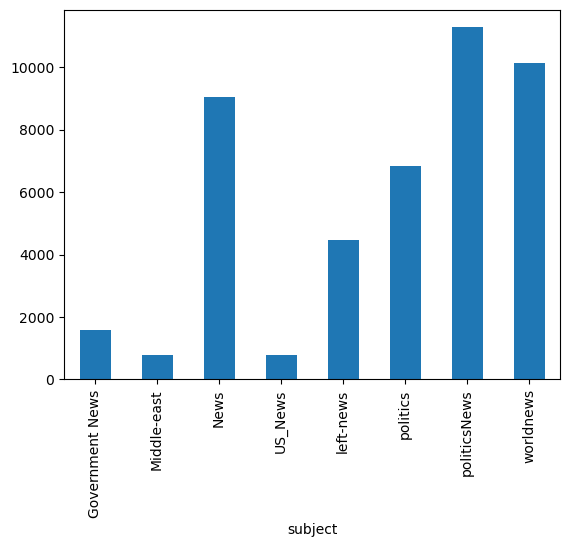

In [71]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

Number of fake and true articles

target
fake    23481
true    21417
Name: text, dtype: int64


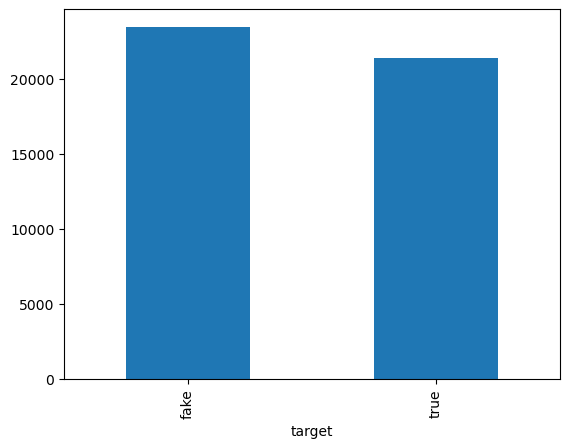

In [72]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [73]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Word Cloud for fake news

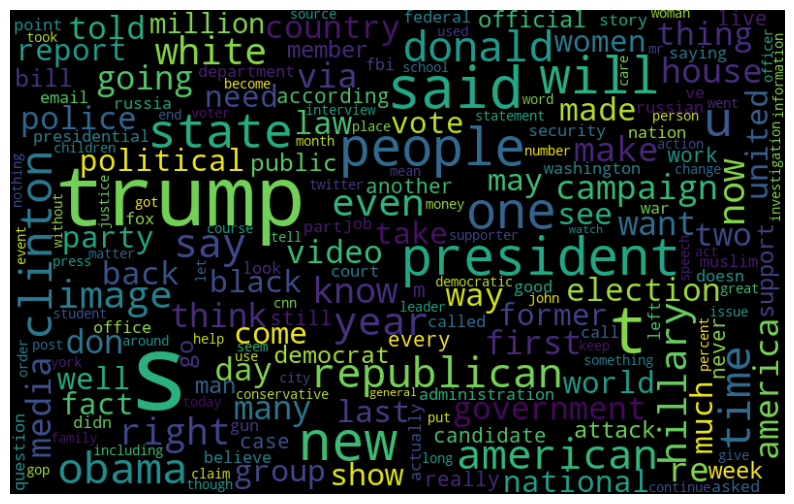

In [76]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

WordCloud for True News

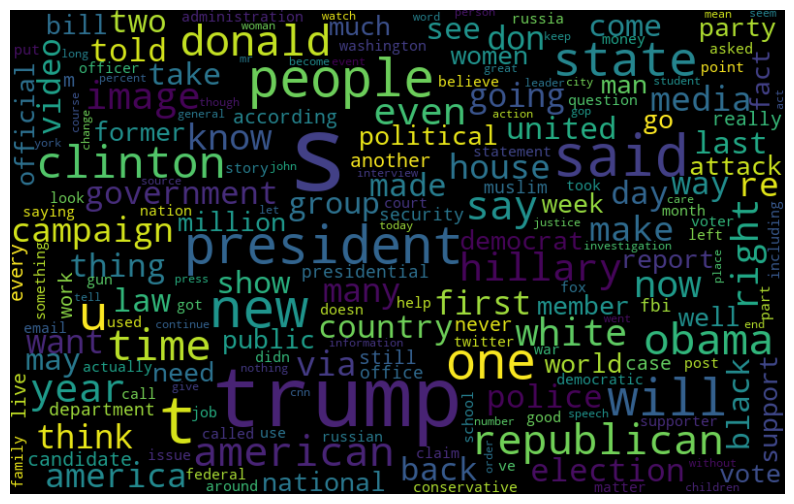

In [77]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# TRAINING  THE  MODEL

In [78]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [79]:
X_train.head()

36335    brussels reuters  britain will  maintain full ...
12384    washington reuters  the trump administration s...
24419    the good news is the clinton crime syndicate i...
24740    by now most of america has seen the crazy vide...
27039    the discussion bret stephens had with his  yea...
Name: text, dtype: object

In [80]:
y_train.head()

36335    true
12384    true
24419    fake
24740    fake
27039    fake
Name: target, dtype: object

# DECISION  TREE  CLASSIFIER

In [81]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.41%


In [85]:
from sklearn import metrics
y_pred=model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4744
        true       0.99      0.99      0.99      4236

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [86]:
metrics.accuracy_score(y_test,y_pred)*100

99.40979955456571

# CONCLUSION

# Thus, Created a iris flower classification model using Decision Tree Regression with an accuracy of 99% .